In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import CSV

In [3]:
df = pd.read_csv('CropPol_field_level_data.csv')

In [3]:
display(df.head())

,study_id,site_id,crop,variety,management,country,latitude,longitude,X_UTM,Y_UTM,...,visit_humbleflies,visit_other_flies,visit_beetles,visit_lepidoptera,visit_nonbee_hymenoptera,visit_others,Publication,Credit,Email_contact,notes
0,Agustin_Saez_Rubus_idaeus_Argentina_2014,Arroyo Claro,Rubus idaeus,Autumn bliss,organic,Argentina,-41.945183,-71.520683,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1126/science.aac7287,Agustin Saez/CONICET (Universidad Nacional del...,agustinsaez@live.com.ar,NaN
1,Agustin_Saez_Rubus_idaeus_Argentina_2014,Miguel,Rubus idaeus,Autumn bliss,organic,Argentina,-42.010350,-71.528050,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1126/science.aac7287,Agustin Saez/CONICET (Universidad Nacional del...,agustinsaez@live.com.ar,NaN
2,Agustin_Saez_Rubus_idaeus_Argentina_2014,Marcelino,Rubus idaeus,Autumn bliss,organic,Argentina,-42.115781,-71.438620,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1126/science.aac7287,Agustin Saez/CONICET (Universidad Nacional del...,agustinsaez@live.com.ar,NaN
3,Agustin_Saez_Rubus_idaeus_Argentina_2014,Valle del Medio,Rubus idaeus,Autumn bliss,organic,Argentina,-41.999750,-71.552483,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1126/science.aac7287,Agustin Saez/CONICET (Universidad Nacional del...,agustinsaez@live.com.ar,NaN
4,Agustin_Saez_Rubus_idaeus_Argentina_2014,Omar,Rubus idaeus,Autumn bliss,organic,Argentina,-42.125874,-71.423180,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1126/science.aac7287,Agustin Saez/CONICET (Universidad Nacional del...,agustinsaez@live.com.ar,NaN


Describe contents

In [4]:
display(df.describe())
display(df.info())

,latitude,longitude,X_UTM,Y_UTM,sampling_start_month,sampling_end_month,field_size,yield,yield2,yield_treatments_no_pollinators,...,visit_honeybee,visit_bombus,visit_wildbees,visit_syrphids,visit_humbleflies,visit_other_flies,visit_beetles,visit_lepidoptera,visit_nonbee_hymenoptera,visit_others
count,3022.000000,3022.000000,4.260000e+02,4.260000e+02,2138.000000,2138.000000,1329.000000,2.552000e+03,1556.000000,925.000000,...,1998.000000,1990.000000,1956.000000,1816.000000,1060.000000,1168.000000,996.000000,1060.000000,1258.000000,1058.000000
mean,31.095755,-33.157792,5.389457e+05,5.528470e+06,5.653882,6.228718,549.528729,4.867523e+03,87.182394,29.229014,...,44.360567,3.221076,7.837136,5.375810,1.310054,4.182063,0.852512,0.421118,4.640709,0.693204
std,24.689600,72.000276,1.167654e+06,2.792896e+06,2.337050,2.211676,4348.363675,4.234786e+04,604.942829,136.818806,...,338.850210,22.580473,112.570643,75.685399,21.320282,31.143693,9.435716,8.503293,61.639296,7.405738
min,-42.127667,-123.197929,-4.069306e+06,1.424900e+05,1.000000,1.000000,0.000375,-1.770894e+00,-1.414558,-2.221444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.209942,-85.758000,3.449599e+05,3.898002e+06,4.000000,5.000000,0.950000,1.388622e+00,0.690153,0.354346,...,0.059535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.680000,-68.271840,4.839776e+05,5.272839e+06,5.000000,6.000000,2.832800,1.230000e+01,1.000000,0.627165,...,0.977406,0.000000,0.027804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.020601,9.592493,6.426535e+05,8.516152e+06,7.000000,7.000000,10.000000,5.612232e+01,15.725360,3.709500,...,9.750000,0.332531,0.482701,0.020779,0.000000,0.014174,0.000000,0.000000,0.000000,0.000000
max,59.865284,176.320387,4.326346e+06,9.757262e+06,12.000000,12.000000,84573.000000,1.500000e+06,10386.597814,1272.600000,...,7574.677560,492.000000,4251.754800,1980.457920,593.704080,607.631040,200.000000,229.787280,1332.723960,113.524560


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   study_id                             3394 non-null   object 
 1   site_id                              3394 non-null   object 
 2   crop                                 3394 non-null   object 
 3   variety                              1642 non-null   object 
 4   management                           2163 non-null   object 
 5   country                              3394 non-null   object 
 6   latitude                             3022 non-null   float64
 7   longitude                            3022 non-null   float64
 8   X_UTM                                426 non-null    float64
 9   Y_UTM                                426 non-null    float64
 10  zone_UTM                             402 non-null    object 
 11  sampling_start_month          

None

In [5]:
countries = df['country'].unique()
display(countries)

array(['Argentina', 'Spain', 'Indonesia', 'USA', 'Tanzania', 'Ireland',
       'Canada', 'Brazil', 'Australia', 'Mexico', 'Switzerland', 'Italy',
       'Netherlands', 'Philippines', 'Germany', 'Sweden', 'Colombia',
       'Poland', 'Japan', 'Norway', 'France', 'UK', 'Thailand',
       'South Africa', 'New Zealand', 'Kenya', 'Belgium', 'Portugal',
       'India', 'Costa Rica', 'Israel', 'China', 'Ecuador', 'Denmark'],
      dtype=object)

In [6]:
countries_Europe = ['Spain', 'Ireland', 'Switzerland', 'Italy', 'Netherlands','Germany', 'Sweden', 'Poland', 'Norway', 'France', 'UK', 
                    'Belgium', 'Portugal', 'Denmark']

In [7]:
df_europe = df[df['country'].isin(countries_Europe)]

In [10]:
df_europe.shape

(1027, 65)

In [11]:
allCrops = df['crop'].unique()
allCrops

array(['Rubus idaeus', 'Fragaria x ananassa', 'Coffea arabica',
       'Coffea canephora', 'Prunus dulcis', 'Brassica napus',
       'Vaccinium corymbosum', 'Passiflora edulis',
       'Anacardium occidentale', 'Annona muricata', 'Annona squamosa',
       'Bixa orellana', 'Gossypium hirsutum', 'Malpighia emarginata',
       'Mangifera indica', 'Persea americana', 'Macadamia integrifolia',
       'Prunus avium', 'Phaseolus vulgaris L.', 'Allium porrum',
       'Malus domestica', 'Pyrus communis', 'Vaccinium macrocarpon',
       'Abelmoschus esculentus', 'Cucumis sativus', 'Lagenaria siceraria',
       'Luffa acutangula', 'Momordica charantia', 'Brassica rapa',
       'Vaccinium meridionale', 'Fagopyrum esculentum',
       'Citrullus lanatus', 'Cucurbita pepo', 'Malus pumila',
       'Prunus cerasus', 'Trifolium pratense', 'Helianthus annuus',
       'Vicia faba', 'Psidium guajava', 'Actinidia deliciosa',
       'Cajanus cajan', 'Citrus limon', 'Citrus paradisi',
       'Capsicum annuum'

In [12]:
topCrop = ['Malus domestica', 'Prunus avium', 'Prunus dulcis', 'Vaccinium corymbosum']

In [13]:
df_europe_topCrop = df_europe[df_europe['crop'].isin(topCrop)]
df_europe_topCrop.shape

(336, 65)

In [14]:
df_topCrop = df[df['crop'].isin(topCrop)]
df_topCrop.shape

(1173, 65)

In [17]:
id_df_europe_topCrop = df_europe_topCrop['study_id'].unique()
id_df_europe_topCrop

array(['Amparo_Lazaro_Prunus_dulcis_Spain_2015',
       'Amparo_Lazaro_Prunus_dulcis_Spain_2016',
       'Christof_Schuepp_Prunus_avium_Switzerland_2011',
       'David_Kleijn_Malus_domestica_Netherlands_2010',
       'David_Kleijn_Malus_domestica_Netherlands_2011',
       'David_Kleijn_Malus_domestica_Netherlands_2013',
       'David_Kleijn_Malus_domestica_Netherlands_2014',
       'David_Kleijn_Vaccinium_corymbosum_Netherlands_2013',
       'David_Kleijn_Vaccinium_corymbosum_Netherlands_2014',
       'Jens_Astrom_Malus_domestica_Norway_2013',
       'Katherine_LW_Burns_Malus_domestica_Ireland_2018',
       'Marcos_Minarro_Malus_domestica_Spain_2015',
       'Marcos_Minarro_Malus_domestica_Spain_2016',
       'Michael_Garratt_Malus_domestica_UK_2011',
       'Nicolas_J_Vereecken_Malus_domestica_France_2016',
       'Nicolas_J_Vereecken_Malus_domestica_Belgium_2019',
       'Nicolas_J_Vereecken_Malus_domestica_France_2019',
       'Nicolas_J_Vereecken_Malus_domestica_Belgium_2017',
   

In [18]:
id_df_europe = df_europe['study_id'].unique()
print(id_df_europe.shape)
id_df_europe

(76,)


array(['Alejandro_Trillo_Fragaria_ananassa_Spain_2016',
       'Alison_D_Oreilly_Brassica_napus_Ireland_2019',
       'Amparo_Lazaro_Prunus_dulcis_Spain_2015',
       'Amparo_Lazaro_Prunus_dulcis_Spain_2016',
       'Christof_Schuepp_Prunus_avium_Switzerland_2011',
       'Dara_Stanley_Brassica_napus_Ireland_2009',
       'Dara_Stanley_Brassica_napus_Ireland_2010',
       'David_Kleijn_Allium_porrum_Italy_2012',
       'David_Kleijn_Malus_domestica_Netherlands_2010',
       'David_Kleijn_Malus_domestica_Netherlands_2011',
       'David_Kleijn_Malus_domestica_Netherlands_2013',
       'David_Kleijn_Malus_domestica_Netherlands_2014',
       'David_Kleijn_Pyrus_communis_Netherlands_2010',
       'David_Kleijn_Pyrus_communis_Netherlands_2011',
       'David_Kleijn_Vaccinium_corymbosum_Netherlands_2013',
       'David_Kleijn_Vaccinium_corymbosum_Netherlands_2014',
       'Frank_Jauker_Brassica_napus_Germany_2006',
       'Georg_Andersson_Brassica_rapa_Sweden_2010',
       'Georg_Andersson_F

In [20]:
df_europe_topCrop.to_csv("shortlist.csv")

In [21]:
cherryStudies = ['Christof_Schuepp_Prunus_avium_Switzerland_2011', 'Ariza_etal_sweetcherry_Belgium_2019', 'Eeraerts_etal_sweetcherry_Belgium_2015', 'Eeraerts_etal_sweetcherry_Belgium_2016', 'Eeraerts_etal_sweetcherry_Belgium_2017']
df_cherry = df_europe[df_europe['study_id'].isin(cherryStudies)]
df_cherry.shape

(69, 65)

In [22]:
df_cherry.columns

Index(['study_id', 'site_id', 'crop', 'variety', 'management', 'country',
       'latitude', 'longitude', 'X_UTM', 'Y_UTM', 'zone_UTM',
       'sampling_start_month', 'sampling_end_month', 'sampling_year',
       'field_size', 'yield', 'yield_units', 'yield2', 'yield2_units',
       'yield_treatments_no_pollinators', 'yield_treatments_pollen_supplement',
       'yield_treatments_no_pollinators2',
       'yield_treatments_pollen_supplement2', 'fruits_per_plant',
       'fruit_weight', 'plant_density', 'seeds_per_fruit', 'seeds_per_plant',
       'seed_weight', 'sampling_richness', 'observed_pollinator_richness',
       'other_pollinator_richness', 'other_richness_estimator_method',
       'richness_restriction', 'sampling_abundance', 'abundance',
       'ab_honeybee', 'ab_bombus', 'ab_wildbees', 'ab_syrphids',
       'ab_humbleflies', 'ab_other_flies', 'ab_beetles', 'ab_lepidoptera',
       'ab_nonbee_hymenoptera', 'ab_others', 'total_sampled_area',
       'total_sampled_time', 'samplin

In [23]:
df_cherry.drop(['yield2', 'yield2_units',
       'yield_treatments_no_pollinators', 'yield_treatments_pollen_supplement',
       'yield_treatments_no_pollinators2',
       'yield_treatments_pollen_supplement2', 'fruits_per_plant',
       'fruit_weight', 'plant_density', 'seeds_per_fruit', 'seeds_per_plant',
       'seed_weight'], axis=1, inplace=True)
df_cherry.shape

C:\Users\psabi\AppData\Local\Temp\ipykernel_11168\2971056097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cherry.drop(['yield2', 'yield2_units',


(69, 53)

In [24]:
df_cherry.drop(['Publication', 'Credit', 'Email_contact', 'notes', 'X_UTM', 'Y_UTM','zone_UTM',
       'sampling_start_month', 'sampling_end_month'], axis=1, inplace=True)
df_cherry.shape

C:\Users\psabi\AppData\Local\Temp\ipykernel_11168\92819303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cherry.drop(['Publication', 'Credit', 'Email_contact', 'notes', 'X_UTM', 'Y_UTM','zone_UTM',


(69, 44)

In [32]:
almondStudies = ['Amparo_Lazaro_Prunus_dulcis_Spain_2015', 'Amparo_Lazaro_Prunus_dulcis_Spain_2016']
df_almond = df_europe[df_europe['study_id'].isin(almondStudies)]
df_almond.shape

(35, 65)

In [49]:
df_almond.drop(['ab_others', 'total_sampled_area'], axis=1, inplace=True)
df_almond.shape

C:\Users\psabi\AppData\Local\Temp\ipykernel_11168\541321196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_almond.drop(['ab_others', 'total_sampled_area'], axis=1, inplace=True)


(35, 28)

In [37]:
df_almond.drop(['visit_others'], axis=1, inplace=True)
df_almond.shape

C:\Users\psabi\AppData\Local\Temp\ipykernel_11168\3223104749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_almond.drop(['visit_others'], axis=1, inplace=True)


(35, 30)

In [38]:
bbStudies = ['David_Kleijn_Vaccinium_corymbosum_Netherlands_2013', 'David_Kleijn_Vaccinium_corymbosum_Netherlands_2014', 'Nicolas_J_Vereecken_Vaccinium_corymbosum_Belgium_2017']
df_bb = df_europe[df_europe['study_id'].isin(bbStudies)]
df_bb.shape

(33, 65)

In [39]:
df_bb.drop(['crop', 'sampling_visitation', 'visitation_rate_units',
       'visitation_rate', 'visit_honeybee', 'visit_bombus', 'visit_wildbees',
       'visit_syrphids', 'visit_humbleflies', 'visit_other_flies',
       'visit_beetles', 'visit_lepidoptera', 'visit_nonbee_hymenoptera',
       'visit_others', 'Publication', 'Credit', 'Email_contact', 'notes', 'country',
       'latitude', 'longitude', 'X_UTM', 'Y_UTM', 'zone_UTM',
       'sampling_start_month', 'sampling_end_month', 'sampling_year', 'yield_treatments_no_pollinators', 'yield_treatments_pollen_supplement', 'fruits_per_plant',
       'fruit_weight', 'plant_density', 'seeds_per_fruit', 'seeds_per_plant',
       'seed_weight'], axis=1, inplace=True)
df_bb.shape

C:\Users\psabi\AppData\Local\Temp\ipykernel_11168\3636896799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bb.drop(['crop', 'sampling_visitation', 'visitation_rate_units',


(33, 30)

In [44]:
nonAppleStudies = ['Amparo_Lazaro_Prunus_dulcis_Spain_2015', 'Christof_Schuepp_Prunus_avium_Switzerland_2011',
 'Ariza_etal_sweetcherry_Belgium_2019',
 'Eeraerts_etal_sweetcherry_Belgium_2015',
 'Eeraerts_etal_sweetcherry_Belgium_2016',
 'Eeraerts_etal_sweetcherry_Belgium_2017',
 'Amparo_Lazaro_Prunus_dulcis_Spain_2016', 'David_Kleijn_Vaccinium_corymbosum_Netherlands_2013', 'David_Kleijn_Vaccinium_corymbosum_Netherlands_2014', 'Nicolas_J_Vereecken_Vaccinium_corymbosum_Belgium_2017']
df_apple = df_europe_topCrop[~df_europe_topCrop['study_id'].isin(nonAppleStudies)]
df_apple.shape

(199, 65)

In [48]:
noYieldData = ['Nicolas_J_Vereecken_Malus_domestica_France_2016', 'Nicolas_J_Vereecken_Malus_domestica_Belgium_2017', 'Nicolas_J_Vereecken_Malus_domestica_Belgium_2016']
df_apple = df_apple[~df_apple['study_id'].isin(noYieldData)]
df_apple.shape

(181, 50)

In [47]:
df_apple.drop(['crop', 
       'latitude', 'longitude', 'X_UTM', 'Y_UTM', 'zone_UTM',
       'sampling_start_month', 'sampling_end_month', 'yield_treatments_no_pollinators', 'yield_treatments_pollen_supplement', 'seeds_per_plant', 
       'seed_weight', 'Credit', 'Email_contact', 'notes'], axis=1, inplace=True)
df_apple.shape

(187, 50)

In [50]:
import seaborn as sns

fruits_per_plant                1.000000
observed_pollinator_richness    0.060248
abundance                       0.498509
ab_honeybee                     0.539960
ab_bombus                      -0.082461
ab_wildbees                    -0.209588
ab_syrphids                     0.039543
ab_humbleflies                  0.120810
ab_other_flies                  0.029516
ab_beetles                     -0.032778
ab_lepidoptera                  0.494651
ab_nonbee_hymenoptera           0.053844
total_sampled_time              0.211750
visitation_rate                -0.281515
visit_honeybee                 -0.256187
visit_bombus                   -0.168521
visit_wildbees                 -0.195392
visit_syrphids                 -0.383861
visit_humbleflies               0.120810
visit_other_flies              -0.382425
visit_beetles                  -0.067632
visit_lepidoptera               0.291185
visit_nonbee_hymenoptera       -0.030989
Name: fruits_per_plant, dtype: float64


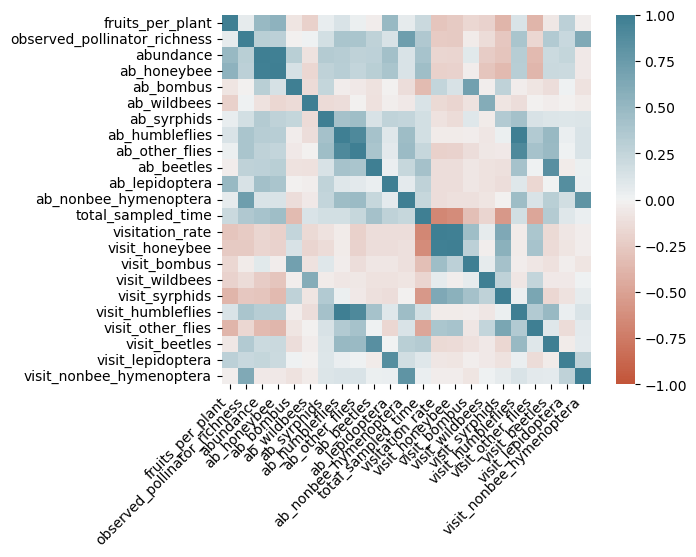

In [57]:
# Select only the numerical columns for correlation
numerical_df_almond = df_almond.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df_almond.corr()

# Create the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


# Extract the correlations of 'fruits_per_plant' with other columns
fruits_per_plant_corr = corr['fruits_per_plant']

# Display the correlations
print(fruits_per_plant_corr)


latitude                       -0.374828
longitude                       0.331023
field_size                     -0.360865
yield                           1.000000
observed_pollinator_richness    0.453992
other_pollinator_richness       0.333168
abundance                      -0.307552
ab_honeybee                    -0.329139
ab_bombus                      -0.146024
ab_wildbees                    -0.072717
ab_syrphids                    -0.096562
ab_humbleflies                       NaN
ab_other_flies                  0.393556
ab_beetles                      0.251941
ab_lepidoptera                       NaN
ab_nonbee_hymenoptera           0.209524
ab_others                       0.133070
total_sampled_area              0.294102
total_sampled_time             -0.381511
visitation_rate                 0.283339
visit_honeybee                 -0.064488
visit_bombus                         NaN
visit_wildbees                  0.129484
visit_syrphids                  0.361899
visit_humbleflie

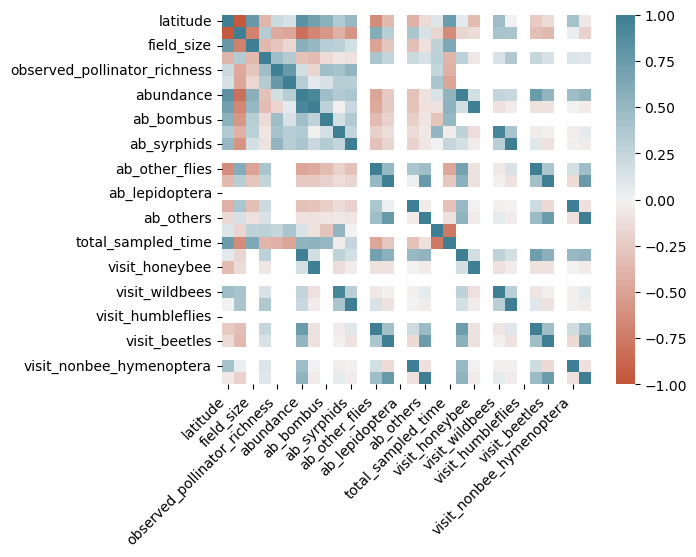

In [58]:
# Select only the numerical columns for correlation
numerical_df_cherry = df_cherry.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df_cherry.corr()

# Create the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


# Extract the correlations of 'fruits_per_plant' with other columns
cherry_yield_corr = corr['yield']

# Display the correlations
print(cherry_yield_corr)



field_size                             0.903975
yield                                  1.000000
yield2                                 0.234853
yield_treatments_no_pollinators2      -0.058568
yield_treatments_pollen_supplement2    0.118750
observed_pollinator_richness           0.196249
other_pollinator_richness              0.007484
abundance                              0.253853
ab_honeybee                            0.246551
ab_bombus                              0.035215
ab_wildbees                           -0.092564
ab_syrphids                            0.218514
ab_humbleflies                              NaN
ab_other_flies                              NaN
ab_beetles                                  NaN
ab_lepidoptera                              NaN
ab_nonbee_hymenoptera                       NaN
ab_others                                   NaN
total_sampled_area                     0.998992
total_sampled_time                    -0.688719
Name: yield, dtype: float64

Fruit Set
f

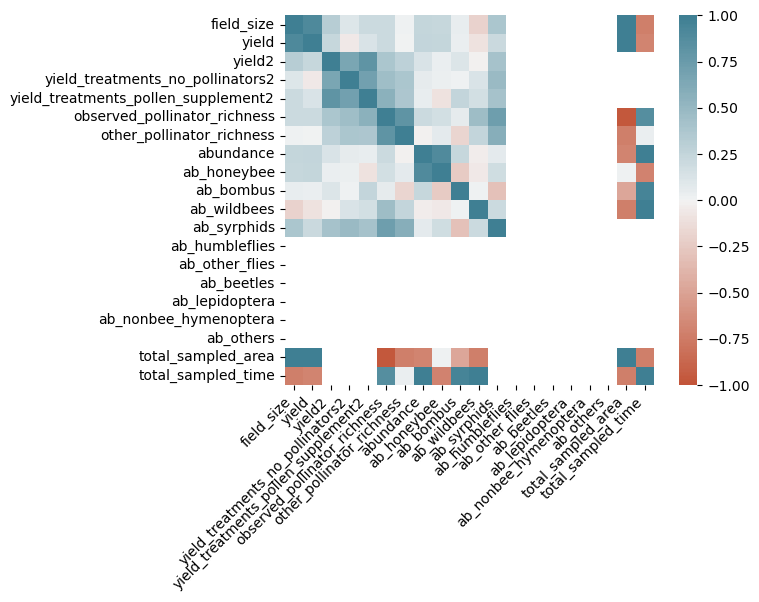

In [59]:
# Select only the numerical columns for correlation
numerical_df_bb = df_bb.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df_bb.corr()

# Create the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


# Extract the correlations of 'fruits_per_plant' with other columns
bb_yield_corr = corr['yield']
bb_fruit_set_corr = corr['yield2']

# Display the correlations
print(bb_yield_corr)
print()
print('Fruit Set')
print(bb_fruit_set_corr)



In [60]:
df_bb.drop(['management', 'yield_treatments_no_pollinators2', 'yield_treatments_pollen_supplement2','other_pollinator_richness','other_richness_estimator_method', 'total_sampled_area', 'total_sampled_time'], axis=1, inplace=True)
df_bb.shape

C:\Users\psabi\AppData\Local\Temp\ipykernel_11168\4251187052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bb.drop(['management', 'yield_treatments_no_pollinators2', 'yield_treatments_pollen_supplement2','other_pollinator_richness','other_richness_estimator_method', 'total_sampled_area', 'total_sampled_time'], axis=1, inplace=True)


(33, 23)

In [61]:
bbStudies = ['David_Kleijn_Vaccinium_corymbosum_Netherlands_2013', 'David_Kleijn_Vaccinium_corymbosum_Netherlands_2014']
df_bb = df_bb[df_bb['study_id'].isin(bbStudies)]
df_bb.shape

(30, 23)

In [63]:
df_almond.drop(['total_sampled_time', 'sampling_visitation', 'visitation_rate_units'], axis=1, inplace=True)
df_almond.shape

C:\Users\psabi\AppData\Local\Temp\ipykernel_11168\3638661925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_almond.drop(['total_sampled_time', 'sampling_visitation', 'visitation_rate_units'], axis=1, inplace=True)


(35, 25)

In [64]:
# Remove rows where 'yield' column has missing values
df_cherry = df_cherry.dropna(subset=['yield'])
df_cherry.shape

(59, 44)

In [65]:

cherry_schuepp = ['Christof_Schuepp_Prunus_avium_Switzerland_2011']
df_cherry_schuepp = df_cherry[df_cherry['study_id'].isin(cherry_schuepp)]
df_cherry_schuepp.shape

(27, 44)

In [66]:
cherryStudies = ['Ariza_etal_sweetcherry_Belgium_2019',
'Eeraerts_etal_sweetcherry_Belgium_2015',
'Eeraerts_etal_sweetcherry_Belgium_2016',
'Eeraerts_etal_sweetcherry_Belgium_2017']
df_cherry = df_cherry[df_cherry['study_id'].isin(cherryStudies)]
df_cherry.shape

(32, 44)

In [67]:

df_cherry.drop(['crop','variety','management','country','latitude','longitude','sampling_year','yield_units','sampling_richness','other_pollinator_richness','other_richness_estimator_method','richness_restriction','sampling_abundance',
'sampling_visitation', 'visitation_rate_units',
       'visitation_rate', 'visit_honeybee', 'visit_bombus', 'visit_wildbees',
       'visit_syrphids', 'visit_humbleflies', 'visit_other_flies',
       'visit_beetles', 'visit_lepidoptera', 'visit_nonbee_hymenoptera',
       'visit_others'], axis=1, inplace=True)
df_cherry.shape

(32, 18)

In [70]:

df_cherry_schuepp.drop(['visitation_rate_units'], axis=1, inplace=True)
df_cherry_schuepp.shape

(27, 26)

In [72]:
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 517 to 546
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   study_id                      30 non-null     object 
 1   site_id                       30 non-null     object 
 2   variety                       30 non-null     object 
 3   field_size                    27 non-null     float64
 4   yield                         27 non-null     float64
 5   yield_units                   27 non-null     object 
 6   yield2                        30 non-null     float64
 7   yield2_units                  30 non-null     object 
 8   sampling_richness             30 non-null     object 
 9   observed_pollinator_richness  30 non-null     float64
 10  richness_restriction          30 non-null     object 
 11  sampling_abundance            30 non-null     object 
 12  abundance                     30 non-null     float64
 13  ab_honeyb

Yield
field_size                      0.901877
yield                           1.000000
yield2                          0.234853
observed_pollinator_richness    0.186565
abundance                       0.108662
ab_honeybee                     0.141749
ab_bombus                      -0.131894
ab_wildbees                    -0.005459
ab_syrphids                     0.218514
ab_humbleflies                       NaN
ab_other_flies                       NaN
ab_beetles                           NaN
ab_lepidoptera                       NaN
ab_nonbee_hymenoptera                NaN
ab_others                            NaN
Name: yield, dtype: float64

Fruit Set
field_size                      0.322914
yield                           0.234853
yield2                          1.000000
observed_pollinator_richness    0.386550
abundance                       0.117918
ab_honeybee                     0.036048
ab_bombus                       0.113956
ab_wildbees                    -0.015611
ab_syrphids 

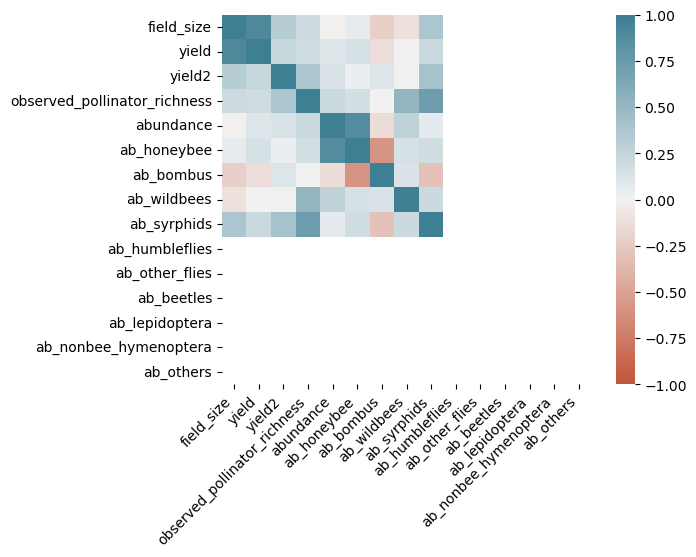

In [71]:
# Select only the numerical columns for correlation
numerical_df_bb = df_bb.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df_bb.corr()

# Create the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


# Extract the correlations of 'fruits_per_plant' with other columns
bb_yield_corr = corr['yield']
bb_fruit_set_corr = corr['yield2']

# Display the correlations
print('Yield')
print(bb_yield_corr)
print()
print('Fruit Set')
print(bb_fruit_set_corr)



Blueberry linear regression with richness

In [85]:
# Prepare the data
X = df_bb[['observed_pollinator_richness']]  # Feature matrix
y = df_bb['yield2']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict 'yield2' values for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
R2 = r2_score(y_test, y_pred)

# Print the model's coefficient and the mean squared error
print("Coefficient for pollinator richness:", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", R2)


Coefficient for pollinator richness: 3.3379272445873123
Intercept: 51.51796160504852
Mean Absolute Error: 15.938958270217393
Mean Squared Error: 352.2081695484951
Root Mean Squared Error: 18.767209956423866
R-squared score: -0.6831435875933733


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.legend(*args, **kwargs)>

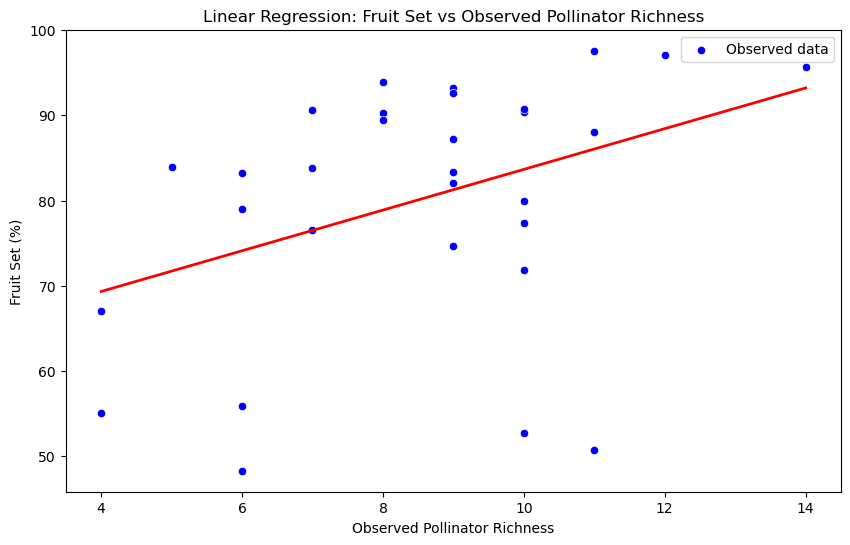

In [78]:
# Train the model on the entire dataset for visualization purposes
model = LinearRegression()
model.fit(X, y)  # X is your feature matrix for 'observed_pollinator_richness', y is 'yield2'

# Predict 'yield2' using the model for a range of 'observed_pollinator_richness' values
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate a range of values within your dataset's range
y_fit = model.predict(X_fit)  # Predict 'yield2' for the generated range of 'observed_pollinator_richness'

# Plot the observed data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['observed_pollinator_richness'], y=y, color='blue', label='Observed data')

# Plot the regression line
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Regression line')

# Customize the plot
plt.xlabel('Observed Pollinator Richness')
plt.ylabel('Fruit Set (%)')
plt.title('Linear Regression: Fruit Set vs Observed Pollinator Richness')
plt.legend


Blueberry linear regression with hoverfly abundance

In [83]:
# Prepare the data
X = df_bb[['ab_syrphids']]  # Feature matrix
y = df_bb['yield2']  # Target variable (fruit set)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict 'yield2' values for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
R2 = r2_score(y_test, y_pred)

# Print the model's coefficient and the mean squared error
print("Coefficient for abundance of syrphids:", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", R2)


Coefficient for abundance of syrphids: 3.392135567225614
Intercept: 73.95410594139585
Mean Absolute Error: 13.467134358315917
Mean Squared Error: 250.4368547279007
Root Mean Squared Error: 15.825196830621119
R-squared score: -0.19679559583378858


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.legend(*args, **kwargs)>

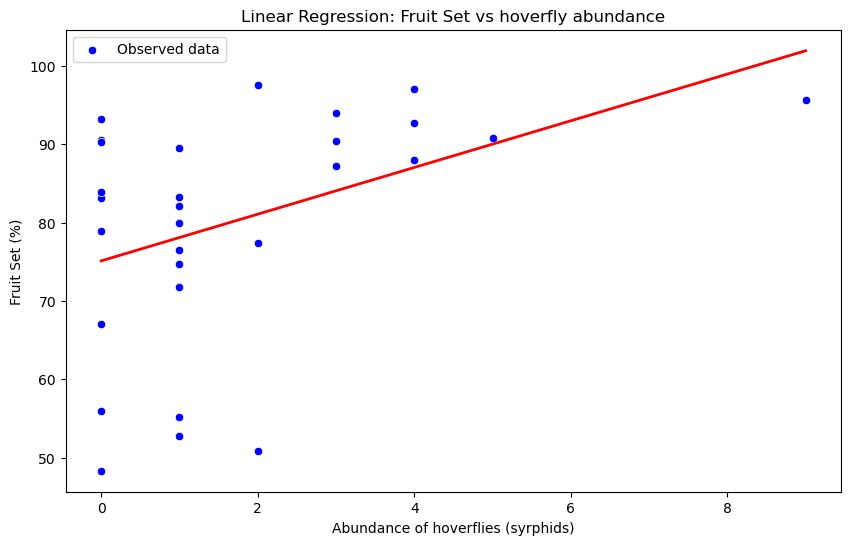

In [80]:
# Train the model on the entire dataset for visualization purposes
model = LinearRegression()
model.fit(X, y)  # X is your feature matrix for 'ab_syrphids', y is 'yield2'

# Predict 'yield2' using the model for a range of 'ab_syrphids' values
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate a range of values within your dataset's range
y_fit = model.predict(X_fit)  # Predict 'yield2' for the generated range of 'ab_syrphids'

# Plot the observed data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['ab_syrphids'], y=y, color='blue', label='Observed data')

# Plot the regression line
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Regression line')

# Customize the plot
plt.xlabel('Abundance of hoverflies (syrphids)')
plt.ylabel('Fruit Set (%)')
plt.title('Linear Regression: Fruit Set vs hoverfly abundance')
plt.legend

Blueberry multiple linear regression

In [86]:
# Prepare the data
features = ['observed_pollinator_richness', 'ab_honeybee', 'ab_bombus', 'ab_wildbees', 'ab_syrphids']
X = df_bb[features]  # Feature matrix
y = df_bb['yield2']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict 'yield2' values for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
R2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", R2)


Coefficients: [ 2.95520015  0.0082453   0.04474172 -1.59660574  1.44047848]
Intercept: 47.2294073447745
Mean Absolute Error: 13.676789173657326
Mean Squared Error: 270.01611704736473
Root Mean Squared Error: 16.432167143969924
R-squared score: -0.29036159648919635


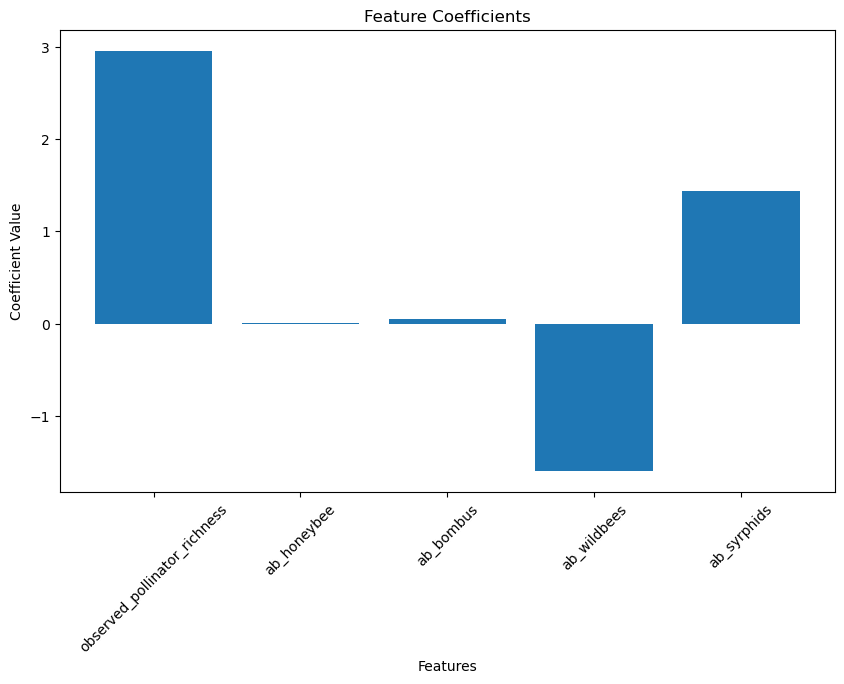

In [87]:
# Assuming 'model' is your trained LinearRegression model and 'features' is your list of feature names
coefficients = model.coef_

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.xticks(rotation=45)
plt.show()


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


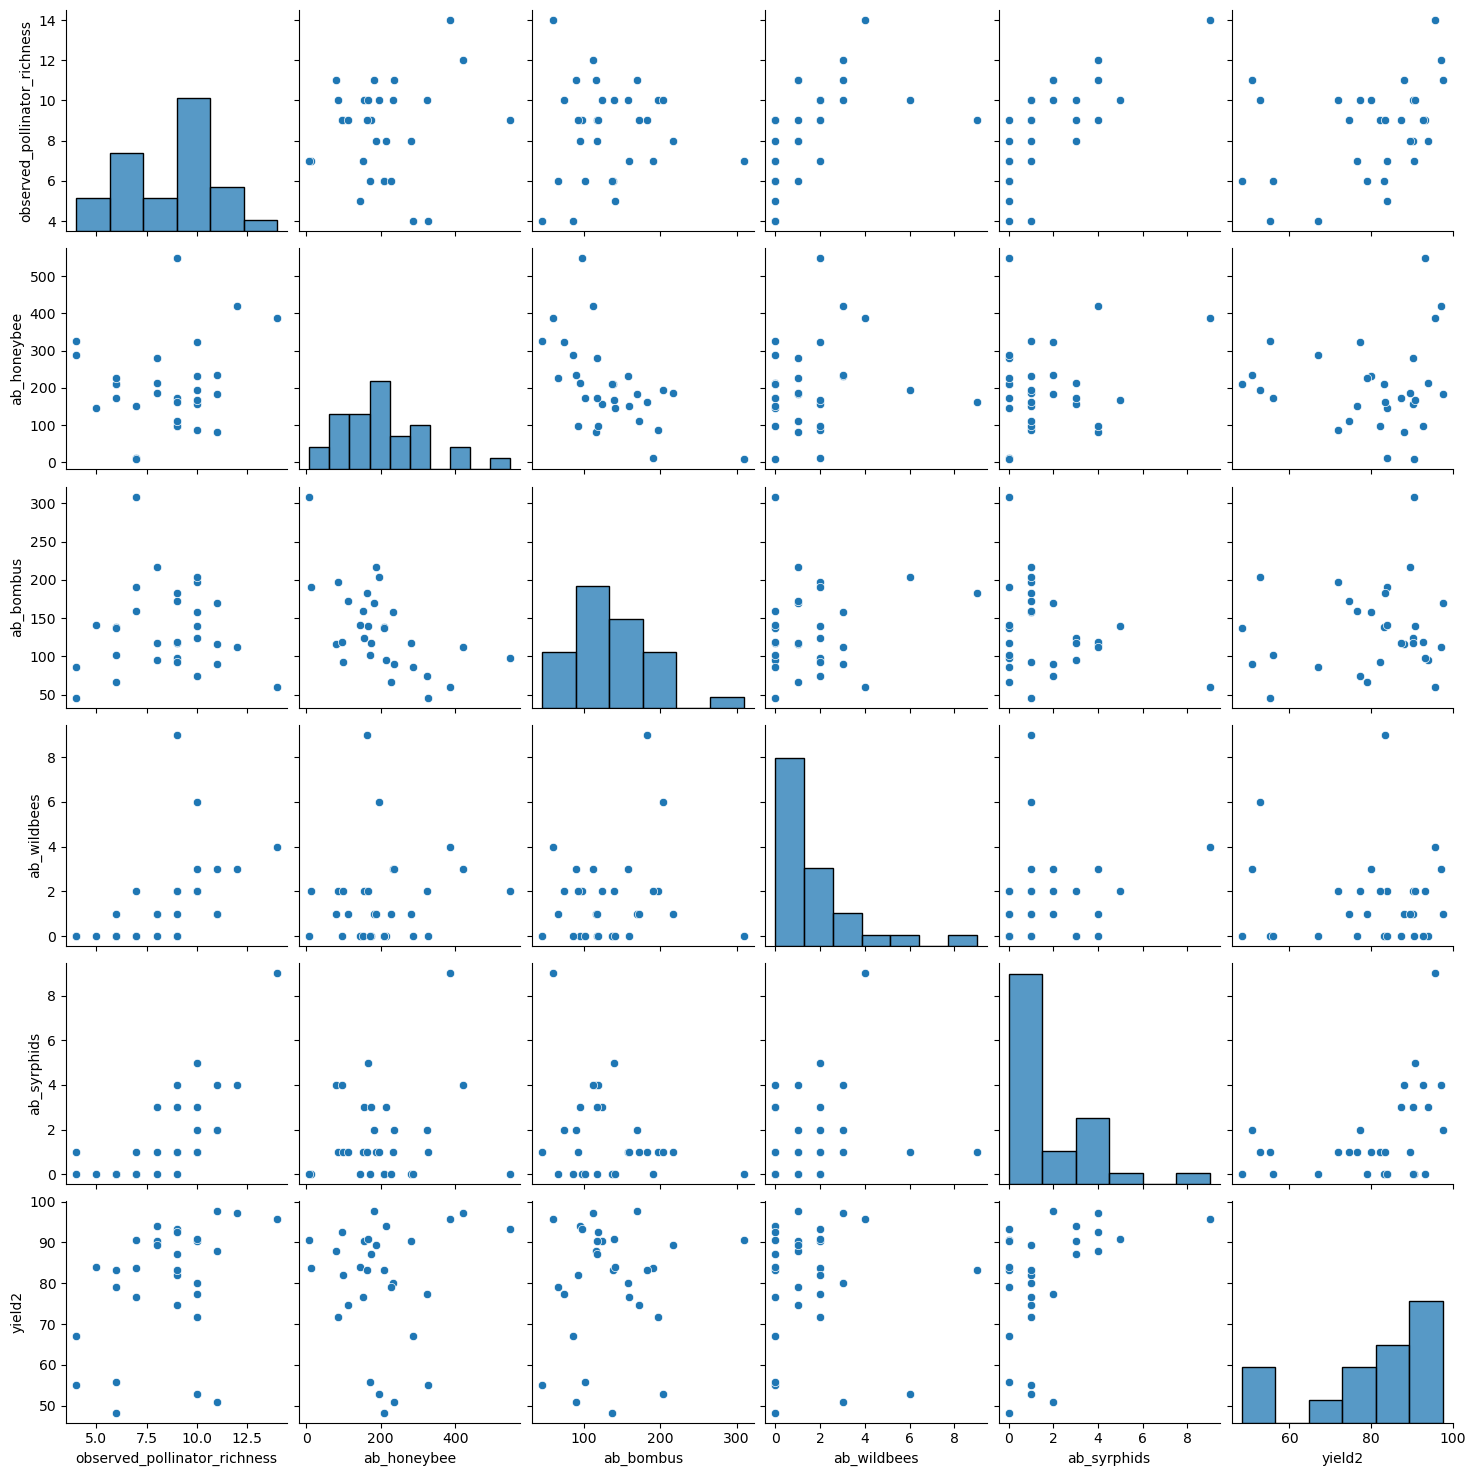

In [88]:
# Add 'yield2' to your features list temporarily for visualization
features_vis = features + ['yield2']
sns.pairplot(df_bb[features_vis])
plt.show()


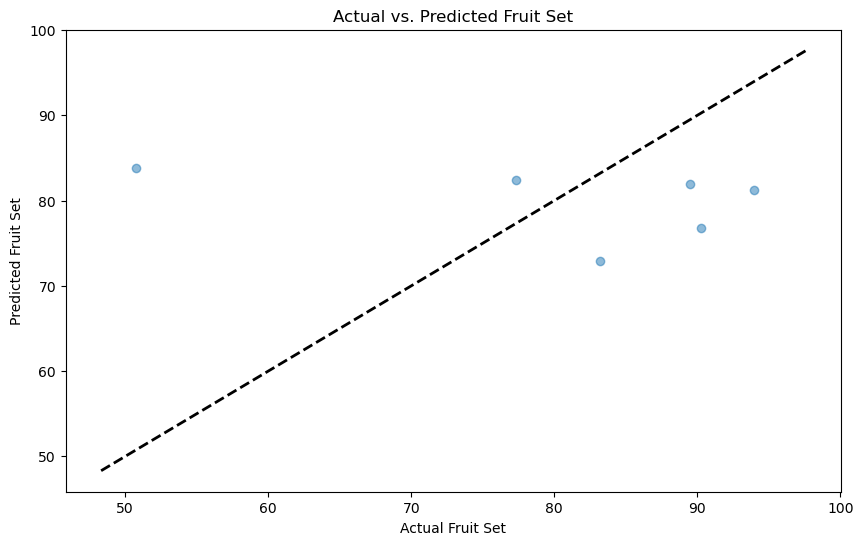

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Fruit Set')
plt.ylabel('Predicted Fruit Set')
plt.title('Actual vs. Predicted Fruit Set')
plt.show()


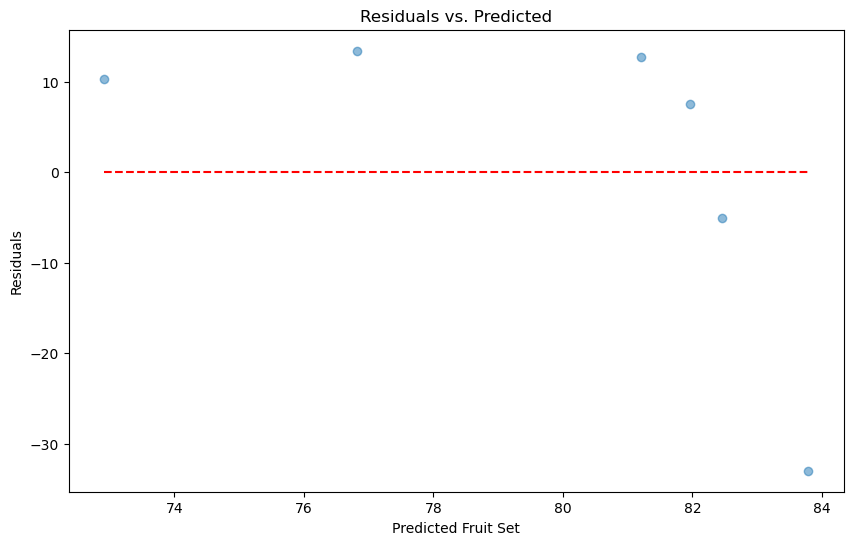

In [90]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Fruit Set')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


In [91]:
df_bb.to_csv('bb.csv')

In [92]:
df_almond.to_csv('almond.csv')
df_cherry.to_csv('cherry.csv')